# Sistemas Dinámicos - Identificación de sistemas
> Gerardo de J. Becerra B.  
> Facultad de Ingeniería, Pontificia Universidad Javeriana.  
> Bogotá, Colombia.

## 1. Introducción.
> Inferring models from observations and studying their properties is really what science is about. The models ("hypotheses", "laws of nature", "paradigms", etc) may be of more or less formal character, but they have the basic feature that they attempt to link observations together into some pattern. System identificacion deals with the problem of building mathematical models of dynamical systems based on observed data from the system. The subject is thus part of basic scientific methodology, and since dynamical systems are abundant in our environment, the techniques of system identification have a wide application area.

> **Lennart Ljung, System Identificacion Theory for the User.**

En general, identificar un sistema consiste en determinar el modelo matemático de un sistema, el cual pertenece a una clase específica de modelos, con base en información de sus entradas y salidas. Para determinarlo se requiere definir un criterio que sirva para seleccionar el modelo que mejor se ajuste a los datos provenientes del sistema. Por lo tanto, para realizar el proceso de identificación se requieren tres elementos:
1. Los datos experimentales obtenidos del sistema/planta real.
2. Un conjunto de modelos delimitado por la clase de sistema que se está identificando.
3. Una regla o criterio para seleccionar el modelo dentro del conjunto definido que *mejor* representa los datos experimentales. Usualmente se utiliza un criterio de error. Los valores de los parámetros se determinan minimizando dicho criterio.

## 2. Proceso de Identificación.
El [proceso de identificación](#ident_process) consiste en 5 etapas generales:


<a name="ident_process"></a>![ident_process](img/ident_process.png)

1. Pruebas experimentales: Se requiere diseñar y ejecutar un experimento que recolecte las señales del sistema:
    - Identificar las señales medibles (entradas, salidas), y los sensores que se van a utilizar para ésto.
    - Identificar las señales manipulables y definir cómo se van a manipular (formas de onda) para excitar el sistema durante el experimento.
    - Identificar las señales no manipulables (disturbios) y si es posible, medirlas.
    - Definir el tratamiento que se dará a las señales (filtraje).
    - Definir la duración del experimento y el periodo al cuál se realizará el muestreo de las señales.
2. Seleccion del orden/estructura del modelo: A partir de conocimiento previo del sistema se define la estructura y el orden del modelo que se va a identificar:
    - Estructura del modelo: lineal invariante en el tiempo (respuesta impulso, función de transferencia, variables de estado), lineal variante en el tiempo, variables de estado no lineal, caja negra (redes neuronales, wavelets), difuso.
    - Orden del modelo: orden de los polinomios (para función de transferencia), número de variables de estado, número de capas/neuronas por capa (para redes neuronales), número de conjuntos difusos (para modelo difuso).
3. Selección del criterio: Se busca definir una prueba para evaluar qué tan buenos son diferentes modelos para *describir* los datos experimentales:
    - Un *buen* modelo es aquel que genera errores de predicción pequeños cuando se aplica a los datos experimentales.
    - Hay muchas maneras posibles para definir la función de predicción $\longrightarrow$ muchas maneras para definir si un modelo es *bueno*.
4. Estimación de parámetros: Con base en los datos y la estructura del modelo, se ejecuta un procedimiento numérico para determinar los parámetros del modelo que mejor se ajusta a los datos:
    - Para la estructura de modelo seleccionada, se define su conjunto de parámetros como el vector $\theta$.
    - Buscar el mejor modelo consiste en determinar $\theta$.
5. Validación del modelo: Se verifica que el modelo se ajuste a los datos diferentes a los empleados para la identificación:
    - ¿El modelo se ajusta suficientemente bien a los datos experimentales?
    - ¿Es suficientemente bueno el modelo para el propósito que se va a utilizar?
    - ¿El modelo obtenido describe al *sistema real*?

Es posible que al final del proceso el modelo obtenido no logre superar la etapa de validación. Ésto puede estar causado por:
1. Los datos no fueron suficientemente informativos, debido a un mal diseño del experimento.
2. El conjunto de modelos no contiene una buena descripción del sistema.
3. El criterio no fue seleccionado apropiadamente.
4. El procedimiento numérico falló en encontrar el mejor modelo de acuerdo al criterio.

## 3. Identificación por el Método de Mínimos Cuadrados.
Éste método fue inventado por Karl Gauss al final del siglo XVII para determinar las órbitas de los planetas. Desde entonces se ha convertido en una herramienta fundamental para la estimación de parámetros a partir de datos experimentales. El método es fácil de entender y de implementar. También se le conoce como *regressión lineal*.

### 3.1 El principio de mínimos cuadrados.
El principio de mínimos cuadrados consiste en un procedimiento matemático por el cual los parámetros desconocidos de un modelo matemático son seleccionados (estimados) tal que la suma de cuadrados de algún error seleccionado sea minimizada. Suponga que un modelo matemático está dado por la siguiente forma: $$y(t) = x_1(t)\theta_1 + x_2(t)\theta_2 + \dots + x_n(t)\theta_n$$ donde $y(t)$ es la variable observada, $\{\theta_1, \theta_2, \dots, \theta_n\}$ es un conjunto de parámetros constantes, $x_1(t)$, $x_2(t)$, $\dots$, $x_n(t)$ son funciones conocidas que pueden depender de otras variables.

Asuma que se toman $N$ muestras de $y(t)$ y de $x_1(t)$, $x_2(t)$, $\dots$, $x_n(t)$ en los instantes de tiempo 1, 2, $\dots$, N. Organizando las muestras según la ecuación anterior, se obtiene un conjunto de ecuaciones lineales de la siguiente forma:
$$
\begin{align}
y(1) &= x_1(1)\theta_1 + x_2(1)\theta_2 + \dots + x_n(1)\theta_n\\
y(2) &= x_1(2)\theta_1 + x_2(2)\theta_2 + \dots + x_n(2)\theta_n\\
&\vdots\\
y(N) &= x_1(N)\theta_1 + x_2(N)\theta_2 + \dots + x_n(N)\theta_n
\end{align}
$$

Éstas ecuaciones pueden organizarse de forma matricial como:
$$
\begin{bmatrix}
    y(1)\\ y(2) \\ \vdots \\ y(N)
\end{bmatrix} = 
\begin{bmatrix}
    x_1(1) & x_2(1) & \dots & x_n(1)\\
    x_1(2) & x_2(2) & \dots & x_n(2)\\
    \vdots & \vdots & \ddots & \vdots\\
    x_1(N) & x_2(N) & \dots & x_n(N)\\
\end{bmatrix}
\begin{bmatrix}
    \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n 
\end{bmatrix}
$$

La anterior ecuación se puede escribir de forma compacta como $y = \Phi \theta$. Una condición necesaria para que éste conjunto de ecuaciones tenga solución es que $N \geq n$. Cuando se tiene $N = n$, la solución es 
$$\hat{\theta} = \Phi^{-1} y$$
asumiendo que la inversa $\Phi^{-1}$ existe. $\hat{\theta}$ corresponde al estimado de $\theta$. Sin embargo, cuando $N > n$ en general no es posible encontrar un vector $\hat{\theta}$ que se ajuste exactamente a todas las muestras, ya que los datos pueden estar contaminados por disturbios o error de medición. Una manera de determinar los parámetros es estimarlos con base en un criterio de error de mínimos cuadrados.

Definiendo el error $\varepsilon$ como
$$\varepsilon(t) = y(t) - \hat{y}(t) = y(t) - \varphi(t)\theta$$
Ahora se selecciona $\hat{\theta}$ tal que el criterio
$$V_{LS} = \frac{1}{N}\sum_{t=1}^N \varepsilon^2(t) = \frac{1}{N}\sum_{t=1}^N \left[y(t) - \varphi(t)\theta \right]^2 = \frac{1}{N}\epsilon^\intercal \epsilon$$
sea minimizado. Aquí 
$$
\epsilon = 
\begin{bmatrix}
    \varepsilon(1) \\ \varepsilon(2) \\ \dots \\ \varepsilon(N)
\end{bmatrix}
$$

Para realizar la minimización se escribe $V_{LS}$ como
$$V_{LS}(\theta) = \frac{1}{N}(y-\Phi\theta)^\intercal(y-\Phi\theta) = \frac{1}{N}\left[y^\intercal y - \theta^\intercal \Phi^\intercal y - y^\intercal \Phi \theta - \theta^\intercal \Phi^\intercal \Phi \theta\right]$$
Tomando la derivada de $V_{LS}(t)$ respecto a $\theta$ e igualando a cero se obtiene
$$\left.\frac{\partial V_{LS}(\theta)}{\partial \theta}\right|_{\theta=\hat{\theta}} = \frac{1}{N}\left[-2\Phi^\intercal y + 2\Phi^\intercal \Phi \hat{\theta}\right] = 0$$
La solución está dada por
$$\hat{\theta} = \left[\Phi^\intercal \Phi\right]^{-1} \Phi^\intercal y$$
Éste resultado se conoce como el **estimador de mínimos cuadrados** de $\theta$

Ésta ecuación tendrá una única solución si y sólo si la matrix
$$\Phi^\intercal \Phi = \frac{1}{N}\sum_{t=1}^N \varphi^\intercal \varphi(t)$$
es no singular.

### 3.2 Estimación de Modelos de Procesos Lineales.
El método de mínimos cuadrados puede utilizarse para estimar modelos de procesos dinámicos lineales. Para el caso particular de funciones de transferencia racionales se asume que el proceso está definido como una ecuación de diferencias de orden $n$:
$$G(q) = \frac{B(q)}{A(q)} = \frac{b_1 q^{-1} + b_2 q^{-2} + \dots + b_n q^{-n}}{1 + a_1 q^{-1} + a_2 q^{-2} + \dots + a_n q^{-n}}$$
Dada la secuencia de datos entrada-salida como
$$y(1), u(1), \dots, y(N+n), u(N+n)$$
y asumiendo que el orden $n$ es conocido, entonces se requiere estimar los parámetros $a_i$ y $b_i$. Para hacerlo se escribe el error como
$$y(t) + a_1 y(t-1) + a_2 y(t-2) +\dots + a_n y(t-n) = b_1 u(t-1) + b_2 u(t-2) + \dots + b_n u(t-n) + \varepsilon(t)$$

El término $\varepsilon(t)$ se usa para tener en cuenta el error de ajuste del modelo a los datos. La anterior ecuación se puede reescribir como
$$y(t) = -a_1 y(t-1) - a_2 y(t-2) - \dots - a_n y(t-n) + b_1 u(t-1) + b_2 u(t-2) + \dots + b_n y(t-n) + \varepsilon(t)$$
$$y(t) = \varphi(t)\theta + \varepsilon(t)$$
donde $\varphi(t)$ es el vector de datos
$$\varphi(t) = \left[-y(t-1),-y(t-2),\dots,-y(t-n),u(t-1),u(t-2),\dots,u(t-n)\right]$$
y $\theta$ el vector de parámetros
$$\theta = 
\begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n \\ b_1 \\ b_2 \\ \vdots \\ b_n
\end{bmatrix}$$

Usando la secuencia de datos se puede formar un sistema de $N$ ecuaciones $y = \Phi \theta + \epsilon$ donde

$$
y =
\begin{bmatrix}
    y(n+1) \\ y(n+2) \\ \vdots \\ y(N)
\end{bmatrix}, 
\epsilon =
\begin{bmatrix}
    \varepsilon(n+1) \\ \varepsilon(n+2) \\ \vdots \\ \varepsilon(N)
\end{bmatrix}
$$

$$
\Phi =
\begin{bmatrix}
    \varphi(n+1) \\ \varphi(n+2) \\ \vdots \\ \varphi(N)
\end{bmatrix} =
\begin{bmatrix}
    -y(n)   & -y(n-1) & \dots  & -y(1)   & | & u(n)   & u(n-1) & \dots  & u(1)\\
    -y(n+1) & -y(n)   & \dots  & -y(2)   & | & u(n+1) & u(n)   & \dots  & u(2)\\
    \vdots  & \vdots  & \ddots & \vdots  & | & \vdots & \vdots & \ddots & \vdots\\
    -y(N-1) & -y(N-2) & \dots  & -y(N-n) & | & u(N-1) & u(N-2) & \dots  & u(N-n)\\
\end{bmatrix}
$$

Entonces, de acuerdo con el principio de mínimos cuadrados, el estimado que minimiza la función de error
$$
V_{LS} = \sum_{t=n+1}^N \varepsilon^2(t) = \sum_{t=n+1}^N \left[y(t)-\varphi(t)\theta\right]^2
$$
es
$$
\hat{\theta} = \left[\Phi^\intercal \Phi \right]^{-1} \Phi^\intercal y
$$
Ésta solución existe si la matriz
$$
\Phi^\intercal \Phi = \sum_{t=n+1}^N \varphi^\intercal \varphi
$$
es no singular.

La ventaja del proceso de identificación paramétrica por el método de mínimos cuadrados es su simplicidad numérica. El método tiene una solución cerrada, debido a que el error es lineal en los parámetros $a_i$ y $b_i$ y que la función cuadrática de error es minimizada. El método funciona bien cuando el nivel de ruido es bajo y el orden del modelo es correcto. Sin embargo el modelo botenido puede tener un *bias* si el orden no es suficientemente alto.

### Ejemplo:
Se tiene un sistema cuyo modelo es desconocido, como se muestra en la siguiente figura:
![sys_exmpl1](img/sys_exmpl1.svg)
El sistema tiene una entrada $u(t)$ que es manipulable, una entrada $v(t)$ que no es manipulable y que corresponde a un disturbio aleatorio desconocido, y la salida $y(t)$ que es una señal medible. Para identificar el modelo del sistema se siguen los siguientes pasos:

#### 1. Experimento:
Se diseña una señal GBN (generalized binary noise test signal) apropiada para aplicarla como entrada $u(t)$ al sistema. Se define una duración del experimento de $N = 1000$ muestras. Al realizar el experimento, se mide la señal de salida $y(t)$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['figure.figsize'] = (14, 9)
matplotlib.rc('text', usetex=True)
matplotlib.rc('axes', grid = False, labelsize=14, titlesize=16, ymargin=0.05)
matplotlib.rc('legend', numpoints=1, fontsize=11)

In [5]:
def gbngen(N,Tsw):
    psw = 1/Tsw
    R = np.random.rand(N,1)
    if R[0] > 0.5:
        P_M = 1
    else:
        P_M = -1
    U = np.zeros((N,1))
    for k in range(0,N):
        if R[k] < psw:
            P_M = -P_M
        U[k] = P_M
    return(U)

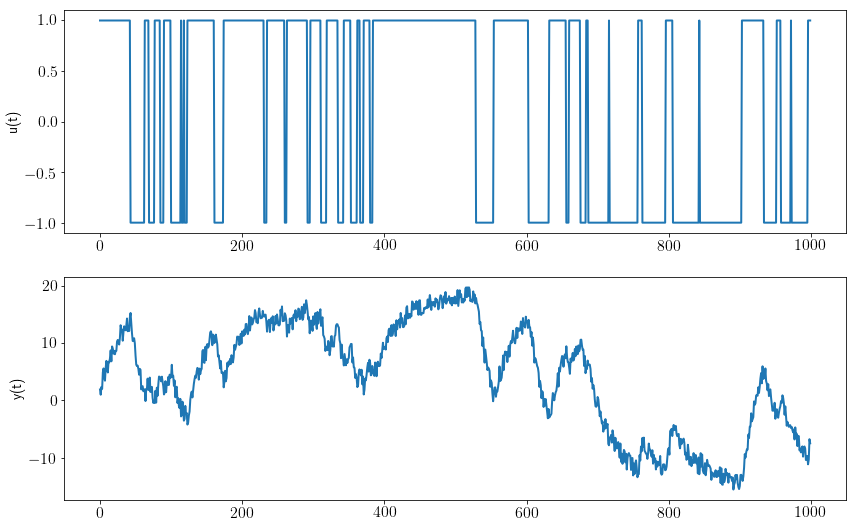

In [6]:
N = 1000
u = gbngen(N,20)
b_real = [0, 0.5]
a_real = [1, -0.97]
y = signal.lfilter(b_real,a_real,u,axis=0)
v = signal.lfilter([1],[1, -0.9],np.random.rand(N,1))
v01 = v/np.std(v)*math.sqrt(0.01)*np.std(y)
y01 = y + v01
f1 = plt.figure()
plt.subplot(2,1,1)
plt.plot(u)
plt.ylabel('u(t)')
plt.subplot(2,1,2)
plt.plot(y01)
plt.ylabel('y(t)')
plt.show()

#### 2. Selección del orden/estructura del modelo:
Se utilizará un modelo de primer orden expresado como la siguiente función de transferencia:
$$
y(t) = \frac{b_1 q^{-1}}{1 + a_1 q^{-1}}u(t) + v(t)
$$
Los parámetros desconocidos en éste modelo y que queremos identificar son $a_1$ y $b_1$.

#### 3. Selección del criterio:
Para hallar el modelo se utilizará el criterio de mínimos cuadrados.

#### 4. Estimación de parámetros:
Se empleará el método de mínimos cuadrados para determinar el valor estimado del vector de parámetros
$$
\theta =
\begin{bmatrix}
    a_1 \\ b_1
\end{bmatrix}
$$
Para hacerlo, es necesario preparar la matriz $\Phi$ para calcular la solución como $\hat{\theta} = \left[\Phi^\intercal \Phi \right]^{-1} \Phi^\intercal y$

In [7]:
n = 1
Phi = np.zeros([N-n,2*n])
row = 1
for t in range(n,N-1):
    Phi[row,:] = np.concatenate((-y01[t:t-n:-1].T,u[t:t-n:-1].T),axis=1)
    row += 1

Entonces, el vector estimado de parámetros $\hat{\theta}$ es:

In [8]:
from numpy.linalg import inv
thetaest = np.matmul(np.matmul(inv(np.matmul(Phi.T,Phi)),Phi.T),y01[1:N])
b1 = thetaest[1]
a1 = thetaest[0]
print('b1 = ',b1)
print('a1 = ',a1)

b1 =  [0.53860714]
a1 =  [-0.96261249]


Éstos coeficientes corresponden al modelo identificado:
$$
y(t) = \frac{b_1 q^{-1}}{1+a_1q^{-1}}u(t) + v(t)
$$

#### 5. Validación del modelo:
Para validar el modelo, se aplica al sistema una señal de entrada diferente y se mide la respuesta experimental, la cual se compara con la respuesta del modelo identificado. El modelo es válido si ambas respuestas son *similares*.

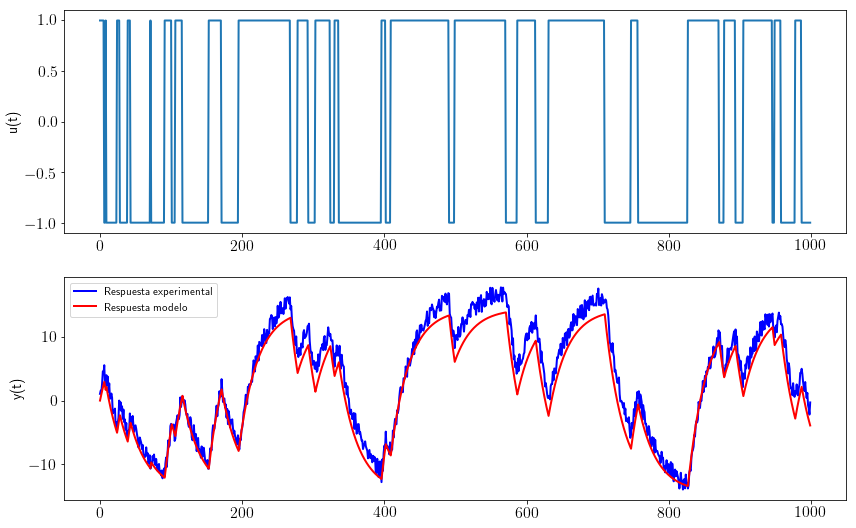

In [9]:
N = 1000
uval = gbngen(N,20)
yval  = signal.lfilter(b_real,a_real,uval,axis=0)
v = signal.lfilter([1],[1, -0.9],np.random.rand(N,1))
v01 = v/np.std(v)*math.sqrt(0.01)*np.std(yval)
y01val = yval + v01
b_mod = [0, b1]
a_mod = [1, a1]
ymod = signal.lfilter(b_mod,a_mod,uval,axis=0)
f1 = plt.figure()
plt.subplot(2,1,1)
plt.plot(np.arange(0,N),uval)
plt.ylabel('u(t)')
plt.subplot(2,1,2)
plt.plot(np.arange(0,N),y01val,'b',label='Respuesta experimental')
plt.plot(np.arange(0,N),ymod,'r',label='Respuesta modelo')
plt.legend(loc='best')
plt.ylabel('y(t)')
plt.show()

## References
- Ljung, L. [System Identification: Theory for the User](https://books.google.com.co/books?isbn=0132440539). 2nd Edition. Prentice Hall, 1999.
- Zhu, Y. [Multivariable System Identification For Process Control](https://books.google.com.co/books?isbn=0080537111). 1st Edition. Elsevier, 2001.